<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Ejercicio 3</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>estudiante: Lazcano Lagos Jhony Brandon</i></h5>
  <h5 align="center"><i>estudiante: Ramírez Montes Jonathan Natael</i></h5>
  <h5 align="center"><i>Análisis Multivariado</i></h5>
  </font>

# 3. Para el dataset de las lagartijas de la tarea 1 realizar el siguiente analisis:  ́

    a) Ajustar un modelo de regresion logística sobre el espacio de características del dataset en R3 (Mass, SVL y HLS). No olvide incluir el resumen del ajuste así como la tabla con la significancia de las variables. En este caso no es necesario hacer particion de train y test.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

In [2]:
rel_path = './datasets/'
lagar = pd.read_csv(rel_path + 'lagartijas.csv')

In [3]:
col_feat = ['Mass', 'SVL', 'HLS']

In [4]:
scaler = StandardScaler()

In [5]:
X = scaler.fit_transform(lagar[col_feat])

In [6]:
X = sm.add_constant(X)
#se declara 1 si es masuclino, cero si es femenino
Y = pd.Series([1 if i == 'm' else 0 for i in lagar['Genero']])

#entrenamiento del modelo
logistic_model = sm.Logit(Y, X).fit(disp = 0) #disp = 0 sólo es la inicialización del algoritmo

print(logistic_model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   25
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            3
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                   1.000
Time:                        17:41:29   Log-Likelihood:            -3.1208e-07
converged:                      False   LL-Null:                       -17.309
Covariance Type:            nonrobust   LLR p-value:                 1.467e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3863   3.22e+04   -1.2e-05      1.000    -6.3e+04     6.3e+04
x1           -36.4912   5.81e+05  -6.28e-05      1.000   -1.14e+06    1.14e+06
x2             9.3555   4.19e+05   2.23e-05      1.0

C:\Users\jonat\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


    b) Calcular y graficar la curva ROC, el AUC y el ́ındice de GINI con base a los scores generados por el modelo logístico. Con un el threshold de 50% de probabilidad y los coeficientes ajustados encuentre la ecuación del plano separador (frontera de decisión).

In [7]:
lagar['proba'] = logistic_model.predict(X)
lagar['y_hat'] = [1 if i >= 0.5 else 0 for i in lagar['proba']]

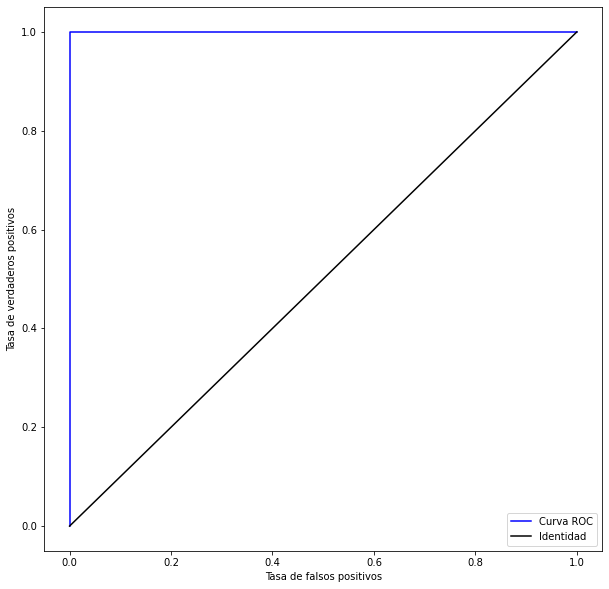

AUC: 1.0
GINI: 1.0


In [8]:
fpr, tpr, test_thresholds  = roc_curve(Y, #valores reales
                                       lagar['proba']) #valores predichos (en probabilidad)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, linestyle='-', color='blue', label='Curva ROC')
plt.plot([0,1],[0,1], color='black', label = 'Identidad')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.legend()
plt.show()

#calcular el area debajo de la curva
print('AUC:',roc_auc_score(Y, #reales
                           lagar['proba']))  #predichos (proba)


print('GINI:',
      2*roc_auc_score(lagar['Genero'],
                      lagar['proba'])-1)

In [9]:
intercept = logistic_model.params[0]
coeficients = list(logistic_model.params[1:]) 

print(f'''la ec. del plano separador es: beta_0 * {intercept} + 
                                         beta_1 * {coeficients[0]} + 
                                         beta_2 * {coeficients[1]} + 
                                         beta_3 * {coeficients[2]}
        ''')

la ec. del plano separador es: beta_0 * -0.38632066189880643 + 
                                         beta_1 * -36.491183148754935 + 
                                         beta_2 * 9.355531849648719 + 
                                         beta_3 * 77.49330789730989
        


    c) Grafique en R3 un scatter de los datos usando diferentes marcadores para hembras y machos. Luego en el mismo plot grafique el plano separador. Con el mismo corte calcular la matriz de confusion, Presicion, Recall, Odds Ratio, F-Score con beta=1.

In [10]:
lagar_centered = pd.DataFrame(X[:,1:], columns = col_feat)
lagar_centered['Genero'] = lagar['Genero'] 

In [11]:
odds = np.log(.5/(1-.5))
# odds = b0+b1x1+b2x2

#recta que separa a azules de rojos 
beta_0 = logistic_model.params[0]
beta_1 = logistic_model.params[1]
beta_2 = logistic_model.params[2]
beta_3 = logistic_model.params[3]


x_1 = np.linspace(lagar_centered['Mass'].min(), lagar_centered['Mass'].max(), 1000)
x_2 = np.linspace(lagar_centered['SVL'].min(), lagar_centered['SVL'].max(), 1000)

X_1, X_2 = np.meshgrid(x_1, x_2)

#despeje de la recta
x_3 = (odds - beta_0 - beta_1*X_1 - beta_2*X_2) * (1/(beta_3))

### Plano separador

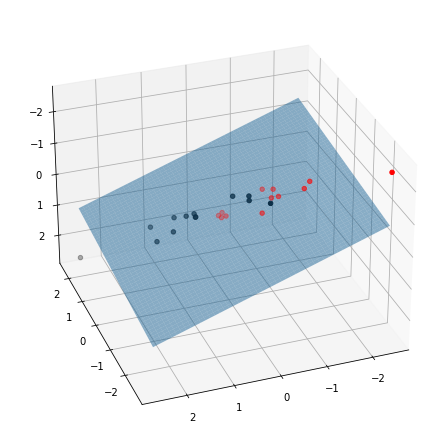

In [12]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

#grafica de hembras
ax.scatter(lagar_centered[lagar_centered['Genero'] == 'f']['Mass'], 
           lagar_centered[lagar_centered['Genero'] == 'f']['SVL'], 
           lagar_centered[lagar_centered['Genero'] == 'f']['Mass'],
           color = 'r'
          )
# Grafica de machos
ax.scatter(lagar_centered[lagar_centered['Genero'] == 'm']['Mass'], 
           lagar_centered[lagar_centered['Genero'] == 'm']['SVL'], 
           lagar_centered[lagar_centered['Genero'] == 'm']['Mass'],
           color = 'black'
          )
ax.plot_surface(X_1,X_2,x_3 , alpha = 0.5)
plt.show()

In [13]:
lagar_centered['proba'],lagar_centered['y_hat'] =lagar['proba'], lagar['y_hat']

In [14]:
print(classification_report(Y, lagar_centered['y_hat']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



<AxesSubplot:>

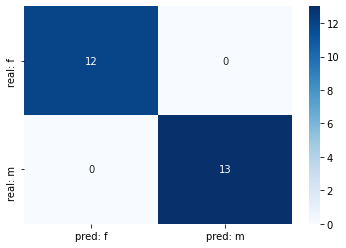

In [15]:
df_mat = pd.DataFrame(confusion_matrix(Y, lagar_centered['y_hat']),
                      columns = ['pred: f', 'pred: m'],
                      index = ['real: f', 'real: m']
                     )
sns.heatmap(df_mat,
            annot = True,
            cmap = 'Blues')

* ODS ratio: 
$$DOR_c = \frac{TPR_c TNR_c }{ FPR_c FNR_c}$$

Dada la formula anterior nuestros ODS ratio sería de CERO ya que no hay falsos positivos ni falsos negativos, es decir que es cero veces probable dar falsos positivos/negativos